## Parte II - TS8 

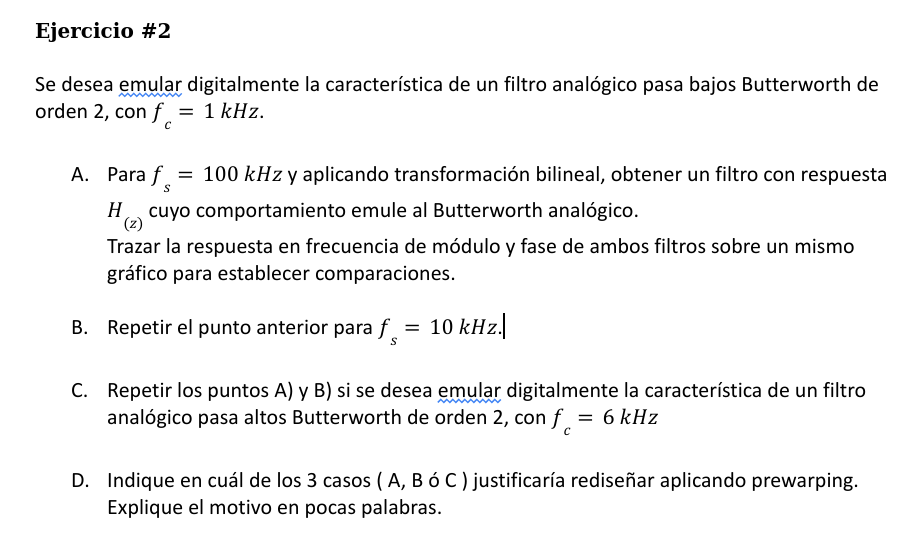

### Punto A 

Partiendo del Butterworth normalizado: 

$$ H(s) = \frac{1}{S^2 + S\sqrt{2} + 1} $$ 

Desnormalizamos: 

$$ H(s) = \frac{1}{(\frac{S}{2\pi1KHz})^2 + \frac{S}{2\pi1KHz}\sqrt{2} + 1} $$

$$ H(s) = \frac{(2\pi1KHz)^2}{S^2+2\pi1KHzS\sqrt{2}+(2\pi1KHz)^2} $$ 

Ahora aplicamos la transformacion bilineal: 

$$ S = 2F_{s}\frac{Z-1}{Z+1} $$ 

$$ H(z) = \frac{(2\pi1KHz)^2(Z+1)^2}{Z^2(4F_{s}^2+2\pi1KHzS\sqrt{2}+(2\pi1KHz)^2+Z(-8F_{s}^2+2(2\pi1KHz)^2)+(2\pi1KHz)^2+4F_{s}^2-\sqrt{2}F_{s}2\pi1KHz} $$ 

Calculo con Python como quedarian los coeficientes: 

In [4]:
import math as m

wc = 2*m.pi*1000 
Fs = 100000

num = [wc**2, 2*wc**2, wc**2]
den = [4*Fs**2+wc*m.sqrt(2)*2*Fs+wc**2, -8*Fs**2+2*wc**2,  wc**2+Fs**2*4-2*m.sqrt(2)*Fs*wc]  
print(num)
print(den)

[39478417.60435743, 78956835.20871486, 39478417.60435743]
[41816631592.8677, -79921043164.79129, 38262325242.34101]


$$ H(z) =  \frac{39478417.60435743Z^2+ 78956835.20871486Z+39478417.60435743}{41816631592.8677Z^2-79921043164.79129Z+38262325242.34101} $$

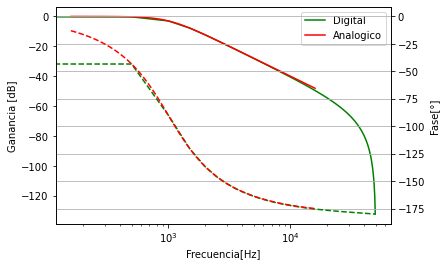

In [25]:


import numpy as np
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as m
import splane as sp


wc = 2*m.pi*1000 
Fs = 100000
num_a = [wc**2]
den_a = [1, m.sqrt(2)*wc, wc**2]

num = [wc**2, 2*wc**2, wc**2]
den =[4*Fs**2+wc*m.sqrt(2)*2*Fs+wc**2, -8*Fs**2+2*wc**2,  wc**2+Fs**2*4-2*m.sqrt(2)*Fs*wc]  


myDigitalFilter = signal.TransferFunction(num,den,dt=1/Fs)
myAnalogFilter = signal.TransferFunction(num_a, den_a)

w_analog, mag_analog,phase_analog = myAnalogFilter.bode()
w_digital, mag_digital,phase_digital = signal.dbode(myDigitalFilter)

fig, ax = plt.subplots()
ax.semilogx(w_digital/(2*m.pi), mag_digital, color='g', label='Digital')  # Magnitud digital
ax.semilogx(w_analog/(2*m.pi), mag_analog, color='r', label='Analogico')  # Magnitud analogica
ax.set_xlabel('Frecuencia[Hz]')
ax.set_ylabel('Ganancia [dB]')
plt.legend()
ax2 = ax.twinx()
ax2.semilogx(w_digital/(2*m.pi), phase_digital, color='g', label='Digital', linestyle='dashed')  # Fase digital
ax2.semilogx(w_analog/(2*m.pi), phase_analog, color='r', label='Analogico', linestyle='dashed')  # Fase analogica¿
ax2.set_ylabel('Fase[°]')
plt.grid()


## Punto B

Solo se ven modificados los coeficientes de la transferencia del filtro digital que dependan de la frecuencia:

$$ H(z) =  \frac{39478417.60435743Z^2+ 78956835.20871486Z+39478417.60435743}{617193735.1306921Z^2-721043164.7912852Z+261763100.07802278} $$

[617193735.1306921, -721043164.7912852, 261763100.07802278]


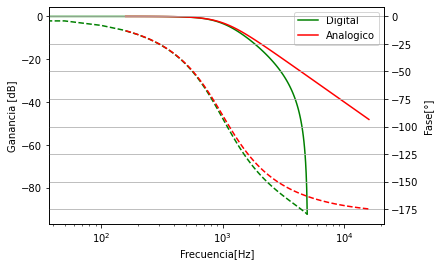

In [24]:
import numpy as np
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as m
import splane as sp


wc = 2*m.pi*1000 
Fs = 10000
num_a = [wc**2]
den_a = [1, m.sqrt(2)*wc, wc**2]

num = [wc**2, 2*wc**2, wc**2]
den =[4*Fs**2+wc*m.sqrt(2)*2*Fs+wc**2, -8*Fs**2+2*wc**2,  wc**2+Fs**2*4-2*m.sqrt(2)*Fs*wc]  

print(den)

myDigitalFilter = signal.TransferFunction(num,den,dt=1/Fs)
myAnalogFilter = signal.TransferFunction(num_a, den_a)

w_analog, mag_analog,phase_analog = myAnalogFilter.bode()
w_digital, mag_digital,phase_digital = signal.dbode(myDigitalFilter)

fig, ax = plt.subplots()
ax.semilogx(w_digital/(2*m.pi), mag_digital, color='g', label='Digital')  # Magnitud digital
ax.semilogx(w_analog/(2*m.pi), mag_analog, color='r', label='Analogico')  # Magnitud analogica
ax.set_xlabel('Frecuencia[Hz]')
ax.set_ylabel('Ganancia [dB]')
plt.legend()
ax2 = ax.twinx()
ax2.semilogx(w_digital/(2*m.pi), phase_digital, color='g', label='Digital', linestyle='dashed')  # Fase digital
ax2.semilogx(w_analog/(2*m.pi), phase_analog, color='r', label='Analogico', linestyle='dashed')  # Fase analogica¿
ax2.set_ylabel('Fase[°]')
plt.grid()


## Punto C

Modelo pasa altos: 

$$ H(s) = \frac{S^2}{S^2 + S\sqrt{2} + 1} $$ 

Desnormalizacion: 

$$ H(s) = \frac{\frac{S^2}{(2\pi6KHz)^2}}{\frac{S^2}{(2\pi6KHz)^2}+\frac{S}{2\pi6KHz}\sqrt{2}+1} $$

$$ H(s) = \frac{S^2}{S^2+2\pi6KHzS\sqrt{2}+(2\pi6KHz)^2} $$

$ H(s) \rightarrow H(z) $

$$ H(z) = \frac{(2F_{s}\frac{Z-1}{Z+1})^2}{(2F_{s}\frac{Z-1}{Z+1})^2+2\pi6KHz\sqrt{2}*(2F_{s}\frac{Z-1}{Z+1})+1} $$

$$ H(z) = \frac{40000000000Z^2-80000000000Z+40000000000}{50662919051.58008Z^2-80000000000Z+29337080949.41992} $$ 

In [7]:
import math as m

wc = 2*m.pi*6000 
Fs = 100000

num = [4*Fs**2, -2*4*Fs**2, 4*Fs**2]
den = [4*Fs**2+wc*m.sqrt(2)*2*Fs, -8*Fs**2,  1+Fs**2*4-2*m.sqrt(2)*Fs*wc]  
print(num)
print(den)

[40000000000, -80000000000, 40000000000]
[50662919051.58008, -80000000000, 29337080949.41992]


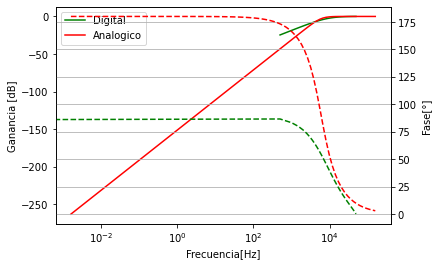

In [23]:
import numpy as np
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as m
import splane as sp


np.seterr(divide = 'ignore') 


wc = 2*m.pi*6000 
Fs = 100000
num_a = [1, 0, 0]
den_a = [1, m.sqrt(2)*wc, wc**2]

num = [4*Fs**2, -2*4*Fs**2, 4*Fs**2]
den = [4*Fs**2+wc*m.sqrt(2)*2*Fs, -8*Fs**2,  1+Fs**2*4-2*m.sqrt(2)*Fs*wc]  


myDigitalFilter = signal.TransferFunction(num,den,dt=1/Fs)
myAnalogFilter = signal.TransferFunction(num_a, den_a)

w_analog, mag_analog,phase_analog = myAnalogFilter.bode()
w_digital, mag_digital,phase_digital = signal.dbode(myDigitalFilter)

fig, ax = plt.subplots()
ax.semilogx(w_digital/(2*m.pi), mag_digital, color='g', label='Digital')  # Magnitud digital
ax.semilogx(w_analog/(2*m.pi), mag_analog, color='r', label='Analogico')  # Magnitud analogica
ax.set_xlabel('Frecuencia[Hz]')
ax.set_ylabel('Ganancia [dB]')
plt.legend()
ax2 = ax.twinx()
ax2.semilogx(w_digital/(2*m.pi), phase_digital, color='g', label='Digital', linestyle='dashed')  # Fase digital
ax2.semilogx(w_analog/(2*m.pi), phase_analog, color='r', label='Analogico', linestyle='dashed')  # Fase analogica¿
ax2.set_ylabel('Fase[°]')
plt.grid()


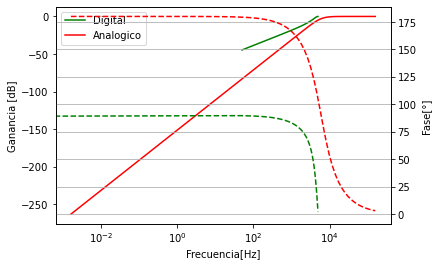

In [22]:
import numpy as np
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as m
import splane as sp


np.seterr(divide = 'ignore') 


wc = 2*m.pi*6000 
Fs = 10000
num_a = [1, 0, 0]
den_a = [1, m.sqrt(2)*wc, wc**2]

num = [4*Fs**2, -2*4*Fs**2, 4*Fs**2]
den = [4*Fs**2+wc*m.sqrt(2)*2*Fs, -8*Fs**2+2,  1+Fs**2*4-2*m.sqrt(2)*Fs*wc]  


myDigitalFilter = signal.TransferFunction(num,den,dt=1/Fs)
myAnalogFilter = signal.TransferFunction(num_a, den_a)

w_analog, mag_analog,phase_analog = myAnalogFilter.bode()
w_digital, mag_digital,phase_digital = signal.dbode(myDigitalFilter)

fig, ax = plt.subplots()
ax.semilogx(w_digital/(2*m.pi), mag_digital, color='g', label='Digital')  # Magnitud digital
ax.semilogx(w_analog/(2*m.pi), mag_analog, color='r', label='Analogico')  # Magnitud analogica
ax.set_xlabel('Frecuencia[Hz]')
ax.set_ylabel('Ganancia [dB]')
plt.legend()
ax2 = ax.twinx()
ax2.semilogx(w_digital/(2*m.pi), phase_digital, color='g', label='Digital', linestyle='dashed')  # Fase digital
ax2.semilogx(w_analog/(2*m.pi), phase_analog, color='r', label='Analogico', linestyle='dashed')  # Fase analogica¿
ax2.set_ylabel('Fase[°]')
plt.grid()



## Punto D 

Aplicaria prewarping en el caso del pasa-altos para conservar la frecuencia de corte intacta, ya que se puede ver modificada por la transformacion bilineal. 

# Ejercicio 3

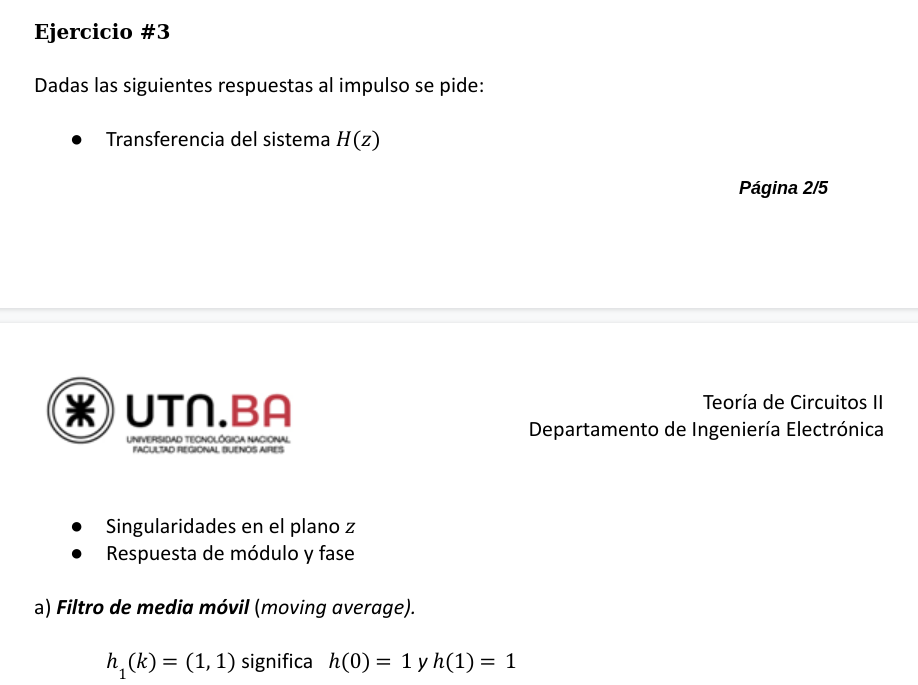


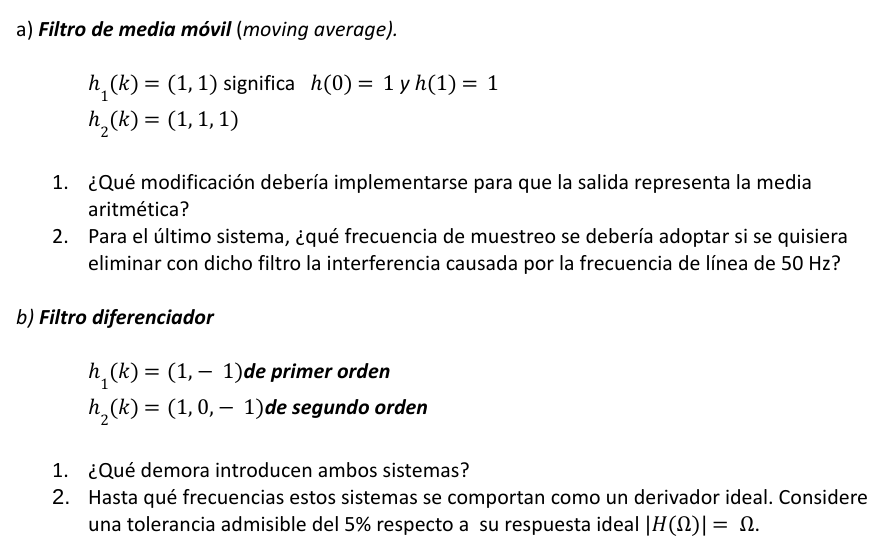


## Punto A 

Expresamos la transferencia 1 y 2: 

$$ H_{1} = 1+Z^{-1} $$ 
$$ H_{2} = 1+Z^{-1}+Z^{-2} $$ 

$$ H_{1}(e^{-j\Omega}) = e^{-j\frac{\Omega}{2}}( e^{-j\frac{\Omega}{2}} +   e^{j\frac{\Omega}{2}}) $$  

$$ |H_{1}(e^{-j\Omega})| = 2cos(\frac{\Omega}{2}) $$ 

$$ \Phi_{1} = -\frac{\Omega}{2} $$ 

$$ H_{2}(e^{-j\Omega}) = e^{-j\Omega}( e^{-j\Omega} +   e^{j\Omega} + 1 ) $$  

$$ |H_{2}(e^{-j\Omega})| = 2cos(\Omega) + 1 $$ 

$$ \Phi_{2} = -\Omega $$ 

Dividiendo por la cantidad de muestras, obtendriamos la media aritmetica. 


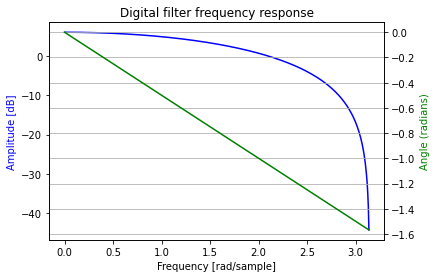

In [10]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html 
# Punto A - H1 
import numpy as np
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as m
import splane as sp


np.seterr(divide = 'ignore') 


num = [1, 1]
den = [1]
 


w,h = signal.freqz(num,den)


fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()


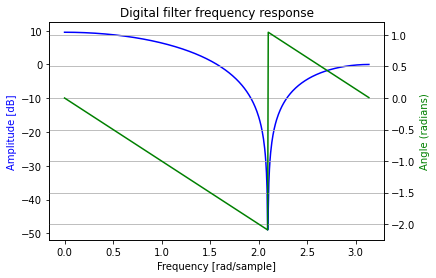

In [11]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html 
# Punto A - H2 
import numpy as np
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as m
import splane as sp


np.seterr(divide = 'ignore') 

num = [1,1, 1]
den = [1]
 


w,h = signal.freqz(num,den)


fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()


## Punto B 

$$ H_{1} = 1-Z^{-1} $$ 
$$ H_{2} = 1-Z^{-2} $$ 

$H_{1}$: cero en 1
$H_{2}$: cero doble en 1 

$$ H_{1}(e^{-jΩ})= 1 - e^{-jΩ}$$

$$ H_{2}(e^{-jΩ})= 1 - e^{-2jΩ}$$

$$ H_{1}(e^{-jΩ})= e^{\frac{-jΩ}{2}} (e^{\frac{jΩ}{2}}-e^{\frac{-jΩ}{2}}) $$

$$ H_{1}(e^{-jΩ})= e^{\frac{-jΩ}{2}}2jsen(\frac{Ω}{2}) $$

$$ |H_{1}(e^{-jΩ})| = 2sen(\frac{Ω}{2}) $$ 

Para el $H_{2}$ es el mismo procedimiento y nos queda: 

$$ |H_{2}(e^{-jΩ})| = 2sen(Ω) $$

Respuestas de fase: 

$$ ϕ_{1} = \Omega/2 $$ 

$$ ϕ_{2} = \Omega $$ 

a) El sistema $H_{1}$ introduce una demora de una muestra y el sistema $H_{2}$ introduce una demora de dos muestras. 

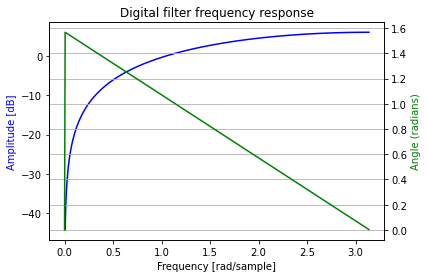

In [12]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html 
# Punto B - H1 
import numpy as np
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as m
import splane as sp

np.seterr(divide = 'ignore') 


num = [1, -1]
den = [1]
 


w,h = signal.freqz(num,den)


fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()


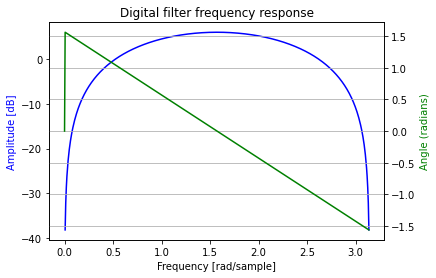

In [13]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html 
# Punto B - H2 
import numpy as np
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as m
import splane as sp

np.seterr(divide = 'ignore') 


num = [1, 0,-1]
den = [1]
 


w,h = signal.freqz(num,den)


fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

## Parte I - TS8 

En el PDF se incluye la resolucion de la parte I y II en papel y debajo se incluyen las simulaciones pertinentes. 

In [1]:
from IPython.display import IFrame
IFrame("./ts8.pdf", width=1000, height=500)

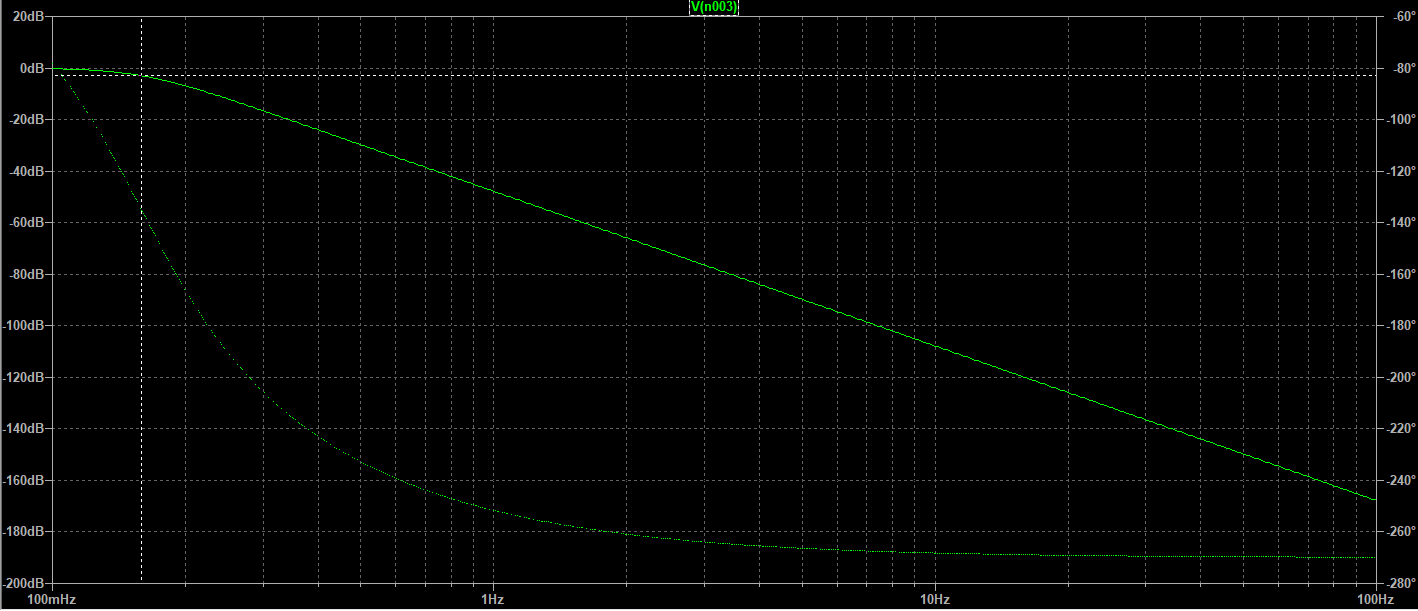
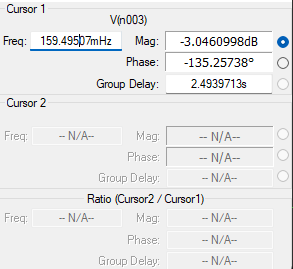

Como podemos ver, la simulacion circuital nos arroja una transferencia de un pasabajos con una frecuencia de corte Wc = 1, que se corresponde con la calculado en papel y posteriormente verificado mediante MAI.  

### Calculo de MAI mediante Python 

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jul  7 20:38:55 2021

@author: mariano

Matriz Admitancia Indefinida (MAI)
----------------------------------
Ejemplos de cálculo simbólico mediante MAI de una red T puenteada de R constante.

Referencias:
------------
Cap. 9. Avendaño L. Sistemas electrónicos Analógicos: Un enfoque matricial.
"""

import sympy as sp
from splane import print_latex, calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn
from IPython.display import display, Math, Latex

# T puenteado cargado: red de R constante
# explicación:
'''    
+ Numeramos los polos de 0 a n=3

4----Ya----1----Yc----2
           |          |
           Yb         G
           |          |
           3          | 
'''    

Ya, Yb, Yc = sp.symbols('Ya Yb Yc', complex=True)
G = sp.symbols('G', real=True, positive=True)

# Armo la MAI

#               Nodos: 1      2        3        4
Ymai = sp.Matrix([  
                    [ Ya+Yc+Yb,   -Yc,      -Yb,     -Ya],
                    [ -Yc,     Yc+G,    -G,    0],
                    [ -Yb,   -G,      G+Yb, 0],
                    [ -Ya,   0,     0,      Ya ]
                 ])

# con_detalles = False
con_detalles = True

print('Transferencia de tensión:')
Vmai = calc_MAI_vtransf_ij_mn(Ymai, 1, 2, 3, 2, verbose=con_detalles)




Transferencia de tensión:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>